Missing values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


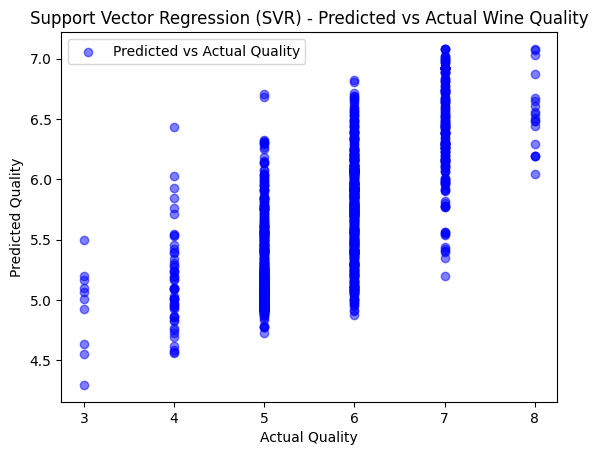

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Step 1: Load the winequality-red dataset
data = pd.read_csv('winequality-red.csv')  # Update the path if necessary

# Step 2: Data Cleaning
# Check for any missing values and handle them if present
print("Missing values in the dataset:\n", data.isnull().sum())

# Impute missing values (if any) with the mean
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 3: Extract the independent and dependent variables
# We will use all columns except "quality" as features (X), and "quality" as the target (y)
X = data.drop(columns=['quality']).values  # Independent variables
y = data['quality'].values                 # Dependent variable (quality)

# Step 4: Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale the features and target
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten y to fit the SVR model

# Step 5: Fit SVR Model
regressor = SVR(kernel='rbf')  # Radial Basis Function (RBF) Kernel
regressor.fit(X_scaled, y_scaled)

# Step 6: Predict with SVR
y_pred_scaled = regressor.predict(X_scaled)

# Inverse transform to get predictions in the original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 7: Visualize Results
# Scatter plot of actual vs predicted values for quality
plt.scatter(y, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Support Vector Regression (SVR) - Predicted vs Actual Wine Quality')
plt.legend()
plt.show()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

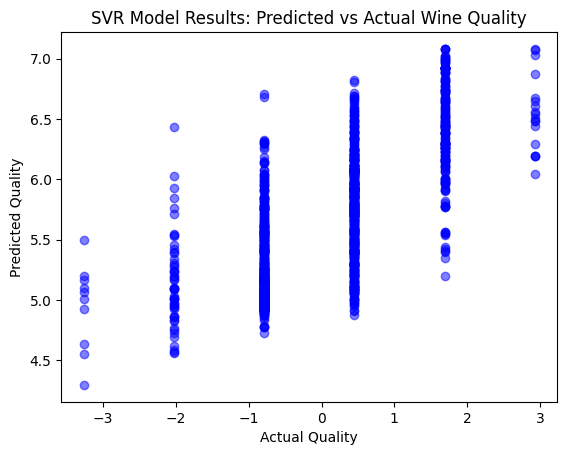

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

warnings.filterwarnings('ignore')

# Load the dataset (ensure the winequality-red.csv is in the current directory)
dataset = pd.read_csv('/content/winequality-red.csv')

# Preview the first few rows of the dataset to understand its structure
print(dataset.head())

# --- Data Preprocessing ---
# Fill missing values with mean (if there are any, though winequality-red usually has no missing values)
dataset.fillna(dataset.mean(), inplace=True)

# Select the features (independent variables) and the target (dependent variable)
X = dataset.drop(columns=['quality']).values  # Features: All columns except 'quality'
y = dataset['quality'].values                 # Target: 'quality'

# --- Feature Scaling ---
# Standardize the features and the target variable
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten y to fit the SVR model

# --- Train SVR Model ---
regressor = SVR(kernel='rbf')
regressor.fit(X, y)  # Train the SVR model

# Predict a new result (inverse transform the prediction to get original scale)
# Ensure `sample_data` has 11 features, same as the input data
sample_data = [[7.4, 0.7, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5.0]]  # Updated to 11 features
y_pred_scaled = regressor.predict(sc_X.transform(sample_data))
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print(f"Predicted Quality for a sample wine: {y_pred[0][0]}")

# --- Model Accuracy (R^2 Score) ---
accuracy = regressor.score(X, y)  # R^2 score
print('Accuracy (R^2 Score) of the model is', accuracy * 100, '%')

# --- Visualize Results ---
# Scatter plot to visualize predicted vs actual quality values
y_pred_all_scaled = regressor.predict(X)
y_pred_all = sc_y.inverse_transform(y_pred_all_scaled.reshape(-1, 1)).ravel()

plt.scatter(y, y_pred_all, color="blue", alpha=0.5)
plt.title("SVR Model Results: Predicted vs Actual Wine Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.show()
